# Jordan Titanic Data Features
**Author:** Jordan  
**Date:** October 31, 2025 <br>
**Objective:** Data inspection, exploration, and preparation for training/test splits.


## Introduction
This project uses seaborn's Titanic dataset to demonstrate pre-processing of data before splitting for analysis and to compare splitting methods.  We will inspect and clean the data before comparing standard pseudo-random splitting to stratified spliting.

## Imports
First, we import the necessary Python libraries for our analysis. 

In [41]:
import matplotlib.pyplot as plt
from numpy.linalg import cond
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from statsmodels.stats.stattools import medcouple

from stats_jordan import tukey_fences

## Section 1. Load and Explore the Data

### 1.1 Load the Dataset
Next, we load the Titanic dataset from seaborn and view its head.

In [42]:
# Load seaborns titanic dataset
titanic_df: pd.DataFrame = sns.load_dataset('titanic')  # noqa: Q000
# Display the first 10 rows of the dataset
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 1.2 Preliminary Inspection

Then, we check for missing values, display summary statistics, and check for correlations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

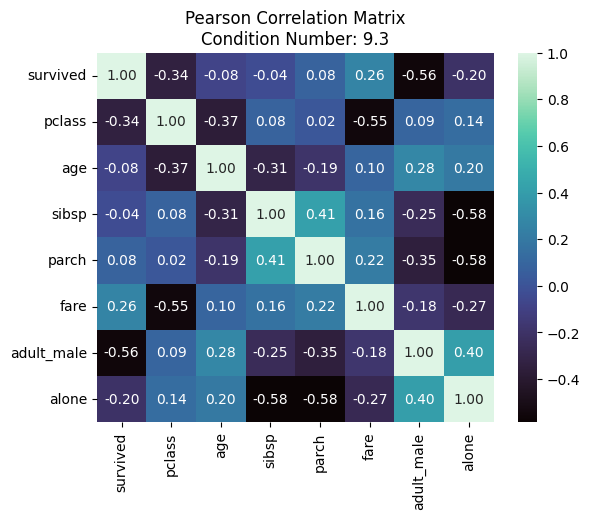

In [43]:
# Check data types and missing values
titanic_df.info()
# Summary statistics
display(titanic_df.describe())
# Check for missing values
display(titanic_df.isnull().sum())
# Check for correlations
titanic_corr: pd.DataFrame = titanic_df.corr(numeric_only=True)
sns.heatmap(titanic_corr, annot=True, cmap='mako', fmt='.2f')  # noqa: Q000
plt.title(f"Pearson Correlation Matrix\nCondition Number: {cond(titanic_corr):.1f}")
plt.show()

### Reflection 1.2:
1) How many data instances are there?  <br>There are 891 data instances in our dataset.
2) How many features are there?  <br>There are 15 features in our dataset.
3) What are the names?  <br>The names of the features are survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, and alone.
4) Are there any missing values?  <br>Yes, there is a total of 869 missing values.
5) Are there any non-numeric features?  <br>Yes, there are 9 non-numeric features.
6) Are the data instances sorted on any of the attributes?  <br>The data instances do not appear to be sorted on any of the attributes.
7) What are the units of age?  <br>The units of age is years.
8) What are the minimum, median and max age?  <br>The minimum, medium and max ages are 0.42, 28 and 80 years respectively.
9)  What two different features have the highest correlation?  <br>The highest correlation of approximately 0.58 is obtained by both pairs parch and alone, and sibsp and alone.
10)  Are there any categorical features that might be useful for prediction?  <br>The categorical features that might be useful for prediction are who, sex (who and sex could be combined into one feature), pclass (same info as class already in ordinal form), alone, and embarked. 

## Section 2. Data Exploration and Preparation

Now, we will explore our dataset with charts.  Depending on what we learn, cleaning and/or feature engineering may be in order.

### 2.1 Create Scatter Matrix, Scatter Plot, Histogram and Count Plot

We create a scatter matrix for the numeric attributes.

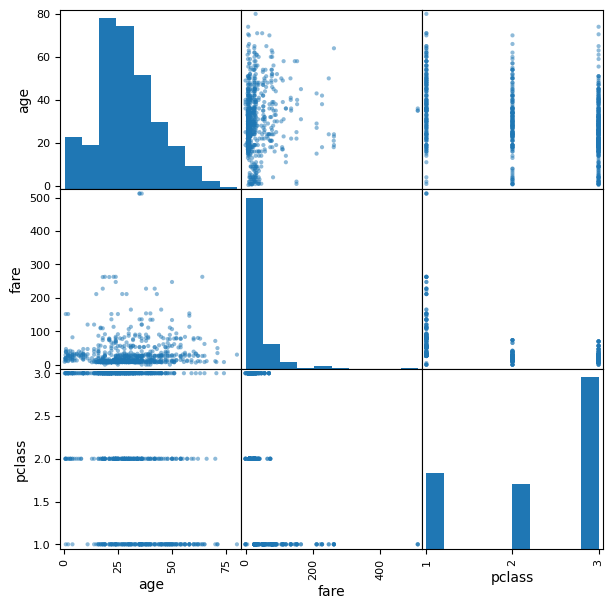

In [44]:
attributes: list = ['age', 'fare', 'pclass']  # noqa: Q000
pd.plotting.scatter_matrix(titanic_df[attributes], figsize=(7,7));

In [45]:
print(f"""
'fare' Medcouple (Robust Skewness): {medcouple(titanic_df["fare"]):.2f}
'fare' Standard Skewness:           {titanic_df["fare"].skew():.2f}
""")


'fare' Medcouple (Robust Skewness): 0.56
'fare' Standard Skewness:           4.79



By both the scatter matrix plot and numerical tesing, the 'fare' feature is heavily positively skewed.  Let's assess 'fare' for outliers.

In [46]:
fare: pd.Series = titanic_df["fare"]

# Loop to compare standard vs. Medcouple-adjusted Tukey fences for 'fare'.
for adj in (False, True):
    fences = tukey_fences(fare, adjusted=adj)
    is_extreme_outlier: pd.Series = (fare > fences.outer_upper) | (fare < fences.outer_lower)
    is_outlier: pd.Series = (fare > fences.inner_upper) | (fare < fences.inner_lower)
    print(f"""
    For 'fare':  Fences Adjusted: {adj}
                 {fences}
                 Total Extreme Outliers: {is_extreme_outlier.sum()}
                 Total Outliers:         {is_outlier.sum()}
    """)


    For 'fare':  Fences Adjusted: False
                 Fences(outer_lower=-61.3584, inner_lower=-26.724, inner_upper=65.6344, outer_upper=100.2688)
                 Total Extreme Outliers: 53
                 Total Outliers:         116
    

    For 'fare':  Fences Adjusted: True
                 Fences(outer_lower=-1.8284, inner_lower=3.041, inner_upper=357.0293, outer_upper=683.0586)
                 Total Extreme Outliers: 0
                 Total Outliers:         18
    


Next, we create a scatter plot of age vs fare, hued by gender.

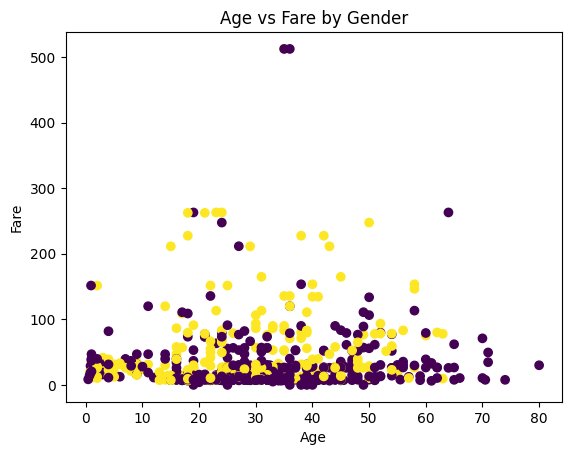

In [47]:
sex_to_int = lambda x: 0 if x == 'male' else 1  # noqa: E731, Q000
plt.scatter(titanic_df['age'], titanic_df['fare'], c=titanic_df['sex'].apply(sex_to_int))  # noqa: Q000
plt.gca().set(xlabel='Age', ylabel='Fare', title='Age vs Fare by Gender')  # noqa: Q000
plt.show()

Noticing that a set of outliers lies above 'fare' of 500, we perform a query.

In [48]:
titanic_df.query("fare > 500")[['fare','age','sex','alone']]  # noqa: Q000

,fare,age,sex,alone
258,512.3292,35.0,female,True
679,512.3292,36.0,male,False
737,512.3292,35.0,male,True


Since the 'alone' feature shows two true and one false, we can deduce that no combination of the three outliers were traveling together.

Now, we create a histogram of age with a kernel density overlay.

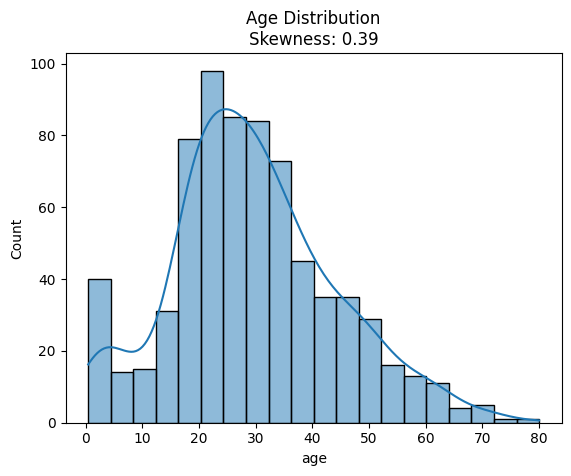

In [49]:
sns.histplot(titanic_df['age'], kde=True) # type: ignore  # noqa: Q000
plt.title(f"Age Distribution\nSkewness: {titanic_df['age'].skew():.2f}")
plt.show()

Finally, we create a count plot for the categorical features class and survival.

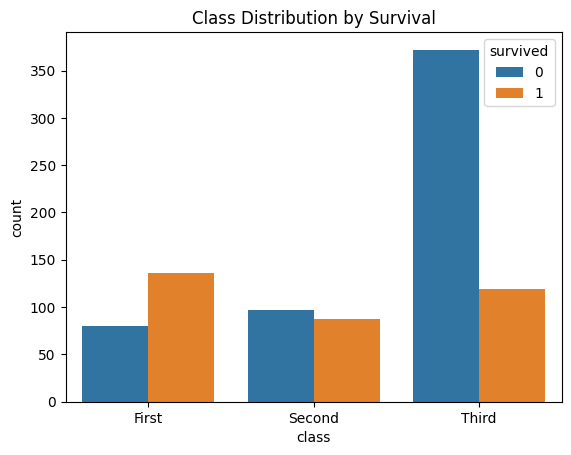

In [50]:
sns.countplot(x='class', hue='survived', data=titanic_df)  # type: ignore # noqa: Q000
plt.title('Class Distribution by Survival')  # noqa: Q000
plt.show()

In [51]:
print(f"{100*sum(fare < 100)/len(fare):.0f}% of passengers paid < £100")
del fare

94% of passengers paid < £100


### Reflection 2.1:

1) What patterns or anomalies do you notice?  <br>The distribution for age is moderately positvely skewed and somewhat bimodal, with a primary peak of 20-25 year olds and a secondary peak of children under 5 years of age.  Fare is heavily positively skewed with 94% of passengers paying less than £100 for a ticket, compared to the maximum ticket fare of over £500.
2) Do any features stand out as potential predictors?  <br>By the count plot, it is apparent the proportion of survivors increases with higher passenger class, as first-class survivors have a much higher survival rate than those in third-class. Thus, class stands out as a potential predictor.
3) Are there any visible class imbalances?  <br>Yes, there appears to be many more third-class passengers than the classes of first and second for the 'class' feature.

### 2.2 Handle Missing Values and Clean Data

The 'age' and 'embark_town' features had missing values, so we impute missing age values using the median and fill missing 'embark_town' values with the mode.

In [52]:
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median())  # noqa: Q000
titanic_df['embark_town'] = titanic_df['embark_town'].fillna(titanic_df['embark_town'].mode()[0])  # noqa: Q000

### 2.3 Feature Engineering
We now create a new feature, 'family_size'.  Then, we convert categorical data to numeric and create a binary feature for 'alone'.

In [53]:
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch'] + 1  # noqa: Q000
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})  # noqa: Q000
titanic_df['embarked'] = titanic_df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # noqa: Q000
titanic_df['alone'] = titanic_df['alone'].astype(int)  # noqa: Q000

### Reflection 2.3

1) Why might family size be a useful feature for predicting survival?  <br>By combining 'sibsp' and 'parch' into one feature, we could potentialy reduce the multicollinearity between them in our model.
2) Why convert categorical data to numeric?  <br>To make the data compatible with machine learning algorithms that rely on mathematical calculations, which in turn allows the model to detect patterns in the data.



## Section 3. Choose Features and Target

With classification in mind, we now select input and target features for our model.


In [54]:
features: list = ["age", "fare", "pclass", "sex", "family_size"]
target: str = "survived"
X: pd.DataFrame = titanic_df[features]  # noqa: N816
y: pd.Series = titanic_df[target]

Reflection 3:

1) Why are these features selected?  <br>These features were selected based on the demographics of the surviving passengers during the sinking of the Titanic, where women, children and the wealthy (first-class passengers who paid more fare) were granted preferential treatment in boarding the life boats.
2) Are there any features that are likely to be highly predictive of survival?  <br>Yes, the feature selection of 'age', 'fare', 'pclass', and 'sex' are likely to be highly predictive of survival due to them capturing the demographic features that influenced who boarded the life boats as mentioned above.

## Section 4. Splitting

We will now split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second.  Then a comparison of the results will be performed.


In [55]:
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X, y, test_size=0.2, random_state = 123)
print(f"""
Train size: {len(X_train_basic)}
Test size:  {len(X_test_basic)}
""")


Train size: 712
Test size:  179



In [56]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_ind, test_ind in splitter.split(X, y):
    X_train_stratified = X.iloc[train_ind]
    X_test_stratified = X.iloc[test_ind]
    y_train_stratified = y.iloc[train_ind]
    y_test_stratified = y.iloc[test_ind]

print(f"""
Train size: {len(X_train_stratified)}
Test size:  {len(X_test_stratified)}
""")


Train size: 712
Test size:  179



In [57]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", X_train_stratified["pclass"].value_counts(normalize=True))
print("Test Set Class Distribution:\n", X_test_stratified["pclass"].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


### Reflection 4

1) Why might stratification improve model performance?  Stratification splits the testing and training sets in proportion to the original target features classes.  This is particulary important for imbalanced datasets, where a model could be trained on a biased sample do to a misbalanced splitting of one or several classes within the target feature.  This can lead to the model performing well for some classes in the target feature and poorly for others.
   
2) How close are the training and test distributions to the original dataset?

In [58]:
data_splits = {
    "Training Stratified": y_train_stratified,
    "Training Basic": y_train_basic,
    "Test Stratified": y_test_stratified,
    "Test Basic": y_test_basic
}
text_width: int = 53
proportions: pd.Series = y.value_counts(normalize=True)

for name, split in data_splits.items():
    split_error: pd.Series = abs(split.value_counts(normalize=True) - proportions) / proportions * 100

    for index in split_error.index:
        text: str = f"{name} Split Percent Error for Class {index}:"
        print(f"{text:<{text_width}} {split_error[index]:>.2f}%")

Training Stratified Split Percent Error for Class 0:  0.07%
Training Stratified Split Percent Error for Class 1:  0.11%
Training Basic Split Percent Error for Class 0:       0.84%
Training Basic Split Percent Error for Class 1:       1.36%
Test Stratified Split Percent Error for Class 0:      0.27%
Test Stratified Split Percent Error for Class 1:      0.43%
Test Basic Split Percent Error for Class 0:           3.36%
Test Basic Split Percent Error for Class 1:           5.40%


3) Which split method produced better class balance?
   
The stratified split method provided a significantly better class balance. All percent errors for the stratified split were consistently low, with a a max error of only 0.43%. In contrast, the basic split method resulted in much higher percent errors, ranging from 0.84% to 5.40%.